In [1]:
!pip install autots

     |████████████████████████████████| 399kB 6.5MB/s 


In [3]:
!pip install auto_ts
from auto_ts import auto_timeseries


     |████████████████████████████████| 92kB 4.1MB/s 
     |████████████████████████████████| 22.3MB 6.3MB/s 
     |████████████████████████████████| 952kB 36.1MB/s 
     |████████████████████████████████| 1.5MB 38.9MB/s 
     |████████████████████████████████| 112kB 35.5MB/s 
ERROR: pmdarima 1.8.2 has requirement statsmodels!=0.12.0,>=0.11, but you'll have statsmodels 0.10.2 which is incompatible.
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0
Imported auto_timeseries version:0.0.36. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.pre

In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/amzn.csv", usecols=['Date', 'Close'])
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

In [6]:
train_df = df.iloc[:2800]
test_df = df.iloc[2800:]

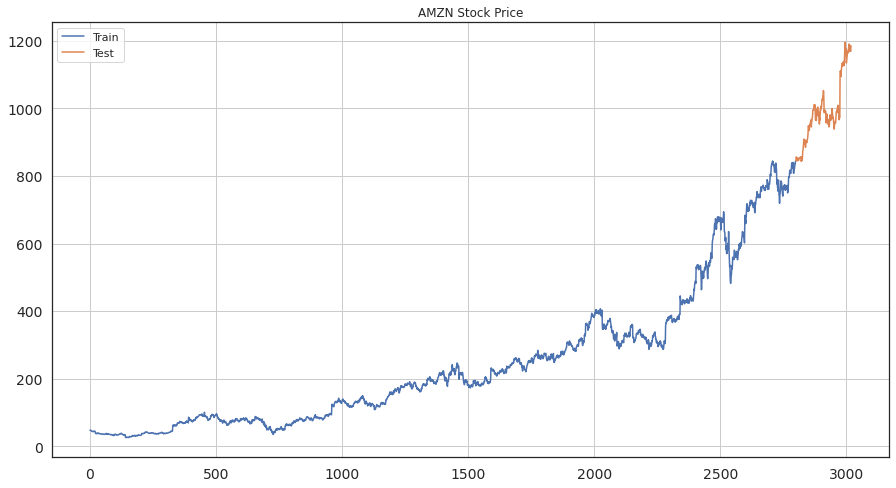

In [8]:
import matplotlib.pyplot as plt
train_df.Close.plot(figsize=(15,8), title= 'AMZN Stock Price', fontsize=14, label='Train')
test_df.Close.plot(figsize=(15,8), title= 'AMZN Stock Price', fontsize=14, label='Test')
plt.legend()
plt.grid()
plt.show()

Start of Fit.....
    Target variable given as = Close
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: Date sep: , target: Close
    Loaded pandas dataframe...
    pandas Dataframe loaded successfully. Shape of data set = (2800, 1)
No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 1705 Test Shape: 219
    Root Mean Squared Error predictions vs actuals = 30.46
    Std Deviation of actuals = 19.52
    Normalized RMSE = 156%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 1924 Test Shape: 219
    Root Mean Squared Error predictions vs actuals = 

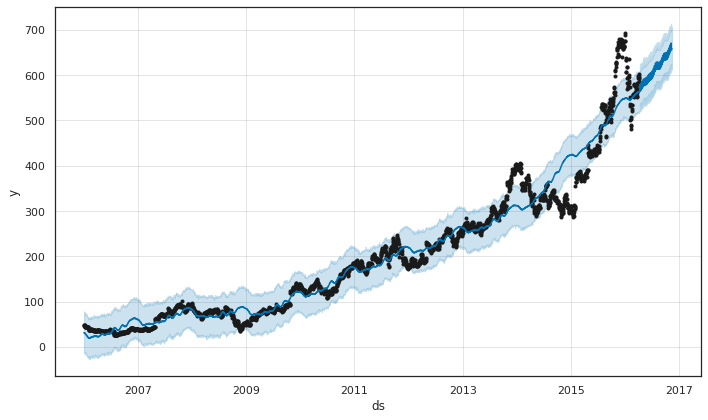

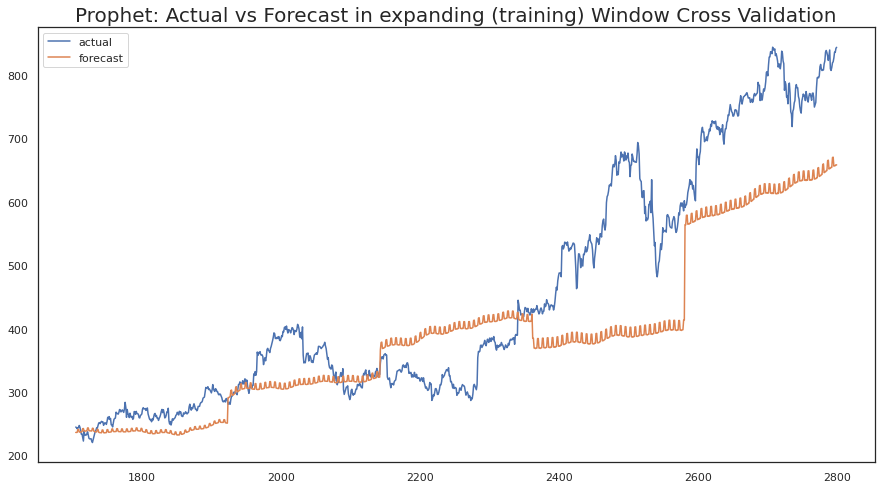

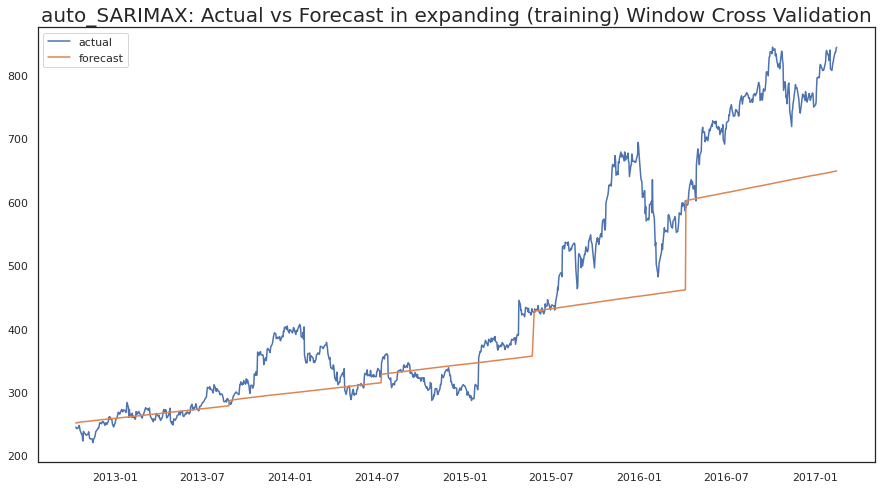

In [9]:
model = auto_timeseries(forecast_period=219, score_type='rmse', time_interval='D', model_type='best')
model.fit(traindata= train_df, ts_column="Date", target="Close")

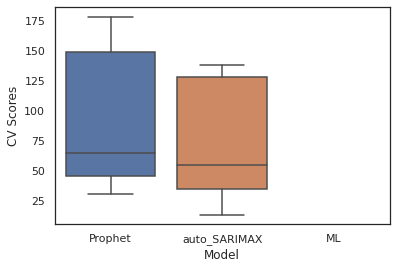

In [10]:
model.get_leaderboard()
model.plot_cv_scores()